# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [1]:
import pandas as pd

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [2]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [3]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

# Your Work

## Data Exploration

### Y - target

In [4]:
print('Target distribution in y_train and y_test:')
print(y_train.value_counts())
print(y_test.value_counts())

# --> imbalance in target variable detected (~ 4:1 ratio)



Target distribution in y_train and y_test:
Recommended IND
1    13535
0     3062
Name: count, dtype: int64
Recommended IND
1    1518
0     327
Name: count, dtype: int64


#### Relabeling target variable
Make the minority class the positive class (1) so recall/precision and threshold tuning target it

In [5]:
y_train = (y_train == 0).astype(int)
y_test = (y_test == 0).astype(int)
# --> 0 = positive review, 1 = negative review

### X - features

Test for colinearity among numeric features:


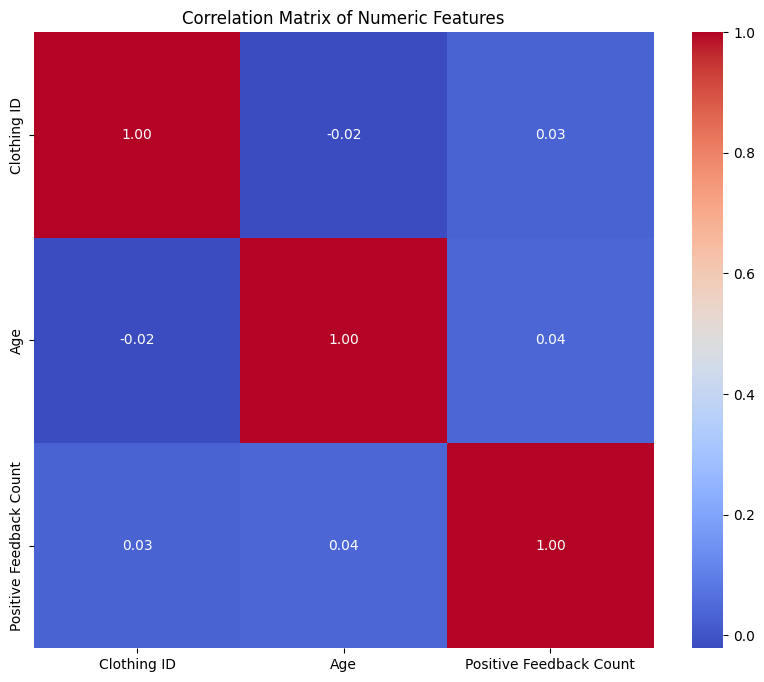

In [6]:
print('Test for colinearity among numeric features:')
import seaborn as sns
import matplotlib.pyplot as plt
numeric_features = X.select_dtypes(include=['int64', 'float64'])
corr = numeric_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# No strong colinearity detected among numeric features
# clothing ID should be considered categorical not numeric --> no reason to consider it here

#### Clothing ID

In [7]:
print('Clothing ID value distribution:')
print(X['Clothing ID'].value_counts())

# --> some clothing IDs have very few samples, consider grouping or encoding carefully

Clothing ID value distribution:
Clothing ID
1078    871
862     658
1094    651
1081    487
829     452
       ... 
596       1
2         1
587       1
962       1
957       1
Name: count, Length: 531, dtype: int64


In [8]:
hierarchical = X[['Clothing ID', 'Department Name', 'Class Name', 'Division Name']]
print('Hierarchical feature sample:')

hierarchical.groupby(['Division Name', 'Department Name', 'Class Name']).nunique()

# --> Hierarchical relationship confirmed among these features
# --> Clothing ID might be irrelevant if higher-level categories are used
# --> Consider using only higher-level categories or encoding Clothing ID carefully
# --> class does not uniquely identify a department and division and department does not uniquely identify a division! Consider using all three levels (does not cause redundancy)

Hierarchical feature sample:


Clothing ID
Division Name  Department Name Class Name                 
General        Bottoms         Casual bottoms            1
                               Jeans                    19
                               Pants                    30
                               Shorts                   76
                               Skirts                   32
               Dresses         Dresses                  50
               Jackets         Jackets                  24
                               Outerwear                21
               Tops            Blouses                  36
                               Fine gauge               30
                               Knits                    42
                               Sweaters                 35
               Trend           Trend                    33
General Petite Bottoms         Jeans                    13
                               Pants                    36
                               Skirts                   21
               Dresses         Dresses                  44
               Intimate        Lounge                   45
               Jackets         Jackets                  22
                               Outerwear                12
               Tops            Blouses                  34
                               Fine gauge               19
                               Knits                    32
                               Sweaters                 14
               Trend           Trend                     5

#### Division, Department & Class Name

In [9]:
print('Division Name value distribution:')
print(X['Division Name'].value_counts())

print('Department Name value distribution:')
print(X['Department Name'].value_counts())

print('Class Name value distribution:')
print(X['Class Name'].value_counts())

# --> some divisions/classes have very few samples, consider grouping or encoding carefully / random sampling during training

Division Name value distribution:
Division Name
General           11664
General Petite     6778
Name: count, dtype: int64
Department Name value distribution:
Department Name
Tops        8713
Dresses     5371
Bottoms     3184
Jackets      879
Intimate     188
Trend        107
Name: count, dtype: int64
Class Name value distribution:
Class Name
Dresses           5371
Knits             3981
Blouses           2587
Sweaters          1218
Pants             1157
Jeans              970
Fine gauge         927
Skirts             796
Jackets            598
Outerwear          281
Shorts             260
Lounge             188
Trend              107
Casual bottoms       1
Name: count, dtype: int64


#### Age

Age distribution (histogram):


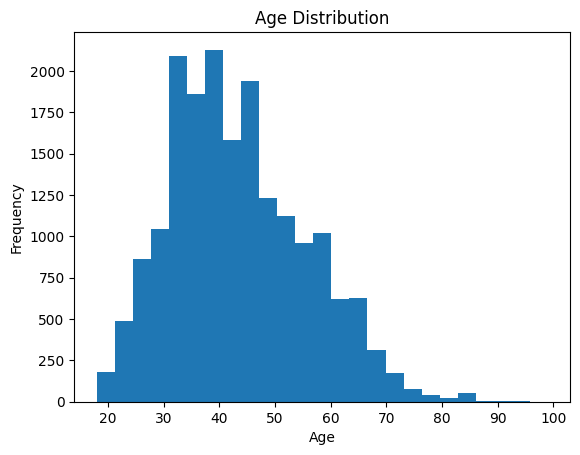

In [10]:
print('Age distribution (histogram):')
plt.hist(X['Age'], bins=25)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

# --> Age distribution appears reasonable, no extreme outliers detected

#### Positive Feedback Count

Positive Feeedback Count distribution (histogram):


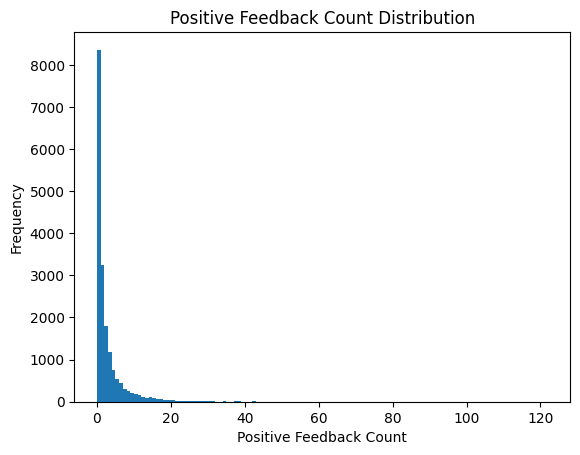

Closer look at high Positive Feedback Counts:


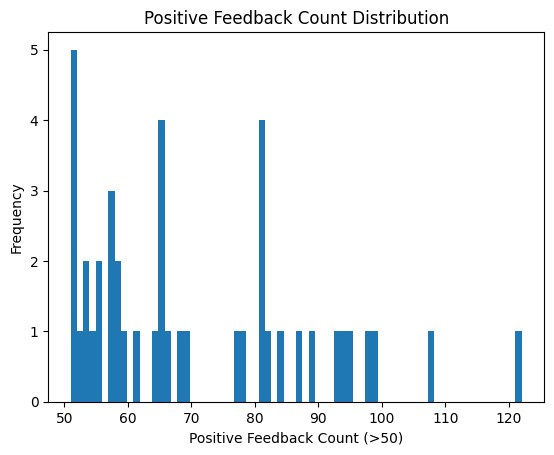

In [11]:
print('Positive Feeedback Count distribution (histogram):')
plt.hist(X['Positive Feedback Count'], bins=X['Positive Feedback Count'].max()-X['Positive Feedback Count'].min())
plt.xlabel('Positive Feedback Count')
plt.ylabel('Frequency')
plt.title('Positive Feedback Count Distribution')
plt.show()

print('Closer look at high Positive Feedback Counts:')
high_feedback = X[X['Positive Feedback Count'] > 50]['Positive Feedback Count']
plt.hist(high_feedback, bins=high_feedback.max()-50)
plt.xlabel('Positive Feedback Count (>50)')
plt.ylabel('Frequency')
plt.title('Positive Feedback Count Distribution')
plt.show()

# most values are low or even 0, with a long tail of high counts; consider log transformation or binning

#### Review Text

Review Text length distribution (histogram):


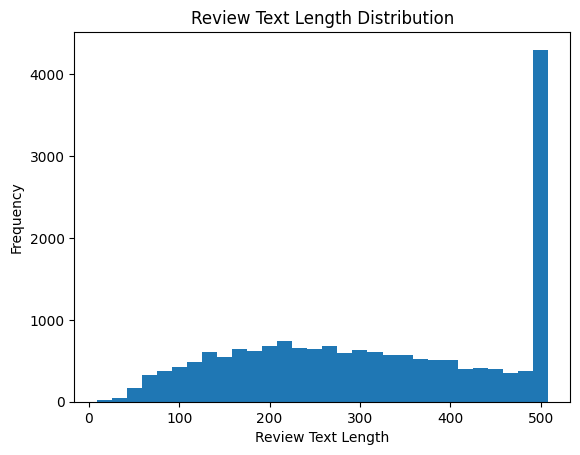

Review Text
17    3
13    2
16    1
14    1
9     1
12    1
15    1
Name: count, dtype: int64
Sample short reviews (<20 characters):
Review 0: Beautiful colors
Review 1: Order a size down
Review 2: Got the green one
Review 3: Soft and sweet
Review 4: Great fit
Review 5: I love birds
Review 6: Great structure
Review 7: Fits perfect!
Review 8: Fits perfect.
Review 9: Love these jeans.


In [12]:
print('Review Text length distribution (histogram):')
review_lengths = X['Review Text'].apply(len)
plt.hist(review_lengths, bins=30)
plt.xlabel('Review Text Length')
plt.ylabel('Frequency')
plt.title('Review Text Length Distribution')
plt.show()

print(review_lengths[review_lengths < 20].value_counts())

print('Sample short reviews (<20 characters):')
for i, review in enumerate(X[X['Review Text'].apply(len) < 20]['Review Text']):
    print(f"Review {i}: {review}")
    
# --> Review text length seem to be ceiled at 500 characters
# --> No empty reviews detected

#### Title

Title length distribution (histogram):


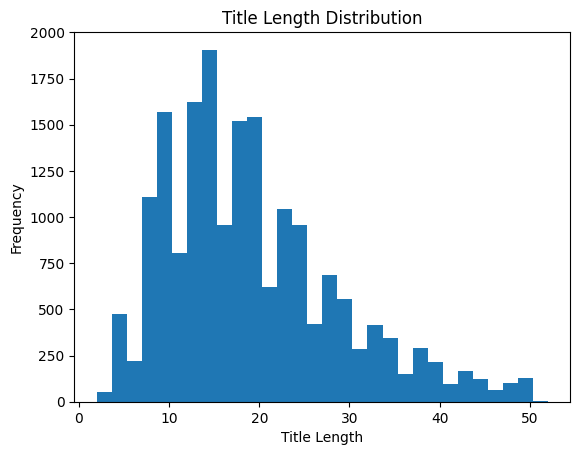

Title
15    998
16    958
14    908
10    846
12    821
11    804
13    803
17    770
19    765
18    752
9     725
8     695
7     412
4     240
5     233
6     221
3      43
2      10
Name: count, dtype: int64
Sample short titles (<20 characters):
Title 0: Mehh
Title 1: Love
Title 2: Huge
Title 3: Huge
Title 4: Fair
Title 5: Fun
Title 6: Cute
Title 7: Love
Title 8: Boxy
Title 9: Cute
Title 10: Love
Title 11: Love
Title 12: Love
Title 13: Love
Title 14: Boxy
Title 15: Wow!
Title 16: Warm
Title 17: Nice
Title 18: Love
Title 19: Huge
Title 20: Love
Title 21: Wide
Title 22: Cute
Title 23: Wow!
Title 24: Huge
Title 25: Nice
Title 26: Wow!
Title 27: Huge
Title 28: Cute
Title 29: Love
Title 30: Huge
Title 31: Chic
Title 32: Huge
Title 33: Love
Title 34: Wow!
Title 35: Cute
Title 36: Okay
Title 37: Huge
Title 38: Cute
Title 39: Nope
Title 40: Boxy
Title 41: Wow
Title 42: No!!
Title 43: Ok
Title 44: Boxy
Title 45: Love
Title 46: Soft
Title 47: Wow
Title 48: Huge
Title 49: Wow!
Title 50: Fit
T

In [13]:
print('Title length distribution (histogram):')
title_lengths = X['Title'].apply(len)
plt.hist(title_lengths, bins=30)
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.title('Title Length Distribution')
plt.show()

print(title_lengths[title_lengths < 20].value_counts())

print('Sample short titles (<20 characters):')
for i, title in enumerate(X[X['Title'].apply(len) < 5]['Title']):
    print(f"Title {i}: {title}")
    
# --> No empty titles detected

## Building Pipeline

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, TargetEncoder
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stopwords, TfidfVectorizer

In [15]:
# no need for imputation, no missing values detected / tasks states data has been cleaned of missing values

### Preprocessing

#### Numeric Preprocessing Pipeline

In [16]:
# preprocessing pipelines for numeric features

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('Clothing ID') # Clothing ID is categorical

numeric_preprocessor = ColumnTransformer(
    transformers=[
        ('age', StandardScaler(), [f for f in numeric_features if f != 'Positive Feedback Count']),
        ('positive_feedback', Pipeline([
            ('log', FunctionTransformer(np.log1p, validate=False)),
            ('scale', StandardScaler())
        ]), ['Positive Feedback Count'])
    ]
)


numeric_preprocessor

,transformers,"[('age', ...), ('positive_feedback', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


#### Categorical preprocessor

In [17]:
# preprocessing pipelines for categorical features

categorical_features = X.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('Review Text')  # Review Text will be handled separately
categorical_features.remove('Title')  # Review Title will be handled separately
# categorical_features.append('Clothing ID')  # Clothing ID is categorical but has high cardinality

# hierarchical features are not unique individually, so we need to
# combine hierarchical features into a single feature (full path representation)

# adapt function for variable list of hierarchical features

def combine_hierarchical_features(X, hierarchy_cols):
    """
    Combine a variable list of hierarchical features into a single composite string.
    
    Parameters:
        X (pd.DataFrame): Input dataframe.
        hierarchy_cols (list of str): Ordered list of column names representing hierarchy.
        
    Returns:
       2D NumPy array: Combined hierarchical feature as strings.
    """
     # Use apply + join to handle any number of columns
    return X[hierarchy_cols].astype(str).agg(' > '.join, axis=1).to_numpy().reshape(-1, 1)


cat_preprocessor = ColumnTransformer(
    transformers=[
        # target encode hierchical features after combining
        ('hierarchy', Pipeline([
            ('combine', FunctionTransformer(combine_hierarchical_features, kw_args={'hierarchy_cols': ['Division Name', 'Department Name', 'Class Name']}, validate=False)),
            ('target', TargetEncoder())
        ]), ['Division Name', 'Department Name', 'Class Name']),
         # One-hot encode division separately
        ('division_ohe', OneHotEncoder(drop='if_binary'), ['Division Name'])
    ]
)

cat_preprocessor

,transformers,"[('hierarchy', ...), ('division_ohe', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,func,<function com...001F437653100>
,inverse_func,None
,validate,False


#### NLP

In [18]:
import spacy

# download spacy model (once!)
# ! python -m spacy download en_core_web_sm

nlp = spacy.load('en_core_web_sm')


In [19]:
nlp_features = ['Review Text', 'Title']

custom_stopwords = list(sklearn_stopwords - {'not', 'no', 'never', 'nor', 'none', 'nothing', 'nowhere', 'nobody'})


import pandas as pd

def count_per_row_str(text, string_to_count):
    """
    Count occurrences of a specific substring or word/char count.
    Works for a single column (Series) or multiple columns (DataFrame).
    
    Parameters:
        text (pd.Series or pd.DataFrame): Text data
        string_to_count (str): 'word', 'char', or substring to count
    
    Returns:
        2D NumPy array: Counts per column
    """
    
    if isinstance(text, pd.Series):
        # Single column
        df = text.to_frame()  # convert to DataFrame for uniform processing
    elif isinstance(text, pd.DataFrame):
        df = text.copy()
    else:
        raise ValueError("Input must be a pandas Series or DataFrame.")
    
    result = pd.DataFrame()
    
    for col in df.columns:
        if string_to_count == 'char':
            result[col] = df[col].astype(str).apply(len)
        elif string_to_count == 'word':
            result[col] = df[col].astype(str).apply(lambda txt: len(txt.split()))
        elif isinstance(string_to_count, str):
            result[col] = df[col].astype(str).apply(lambda txt: txt.count(string_to_count))
        else:
            raise ValueError("string_to_count must be 'char', 'word', or a specific substring")
    
    # Return a **2D NumPy array**, compatible with ColumnTransformer
    return result.values  # shape: (n_samples, n_columns)


# Lemmatization
def lemmatize_text(X, nlp):
    """
    Lemmatize a pandas Series or single-column DataFrame of text using spaCy.
    
    Parameters:
        X (pd.Series or pd.DataFrame): Text data.
        nlp: spaCy language model.
    
    Returns:
        pd.Series: Series of lemmatized text.
    """

    # Convert single-column DataFrame to Series
    if isinstance(X, pd.DataFrame) and X.shape[1] == 1:
        text_series = X.iloc[:, 0]
    elif isinstance(X, pd.Series):
        text_series = X
    else:
        raise ValueError("Input must be a pandas Series or single-column DataFrame.")
    
    lemmatized_texts = []
    for doc in nlp.pipe(text_series, batch_size=50):
        lemmatized_text = ' '.join([token.lemma_ for token in doc if not token.is_punct])
        lemmatized_texts.append(lemmatized_text)
    
    return pd.Series(lemmatized_texts)



nlp_preprocessor = ColumnTransformer(
    transformers=[
        ('word_count', FunctionTransformer(count_per_row_str, kw_args={'string_to_count': 'word'}, validate=False), nlp_features),
        ('character_count', FunctionTransformer(count_per_row_str, kw_args={'string_to_count': 'char'}, validate=False), nlp_features),
        ('Count_exclamation', FunctionTransformer(count_per_row_str, kw_args={'string_to_count': '!'}, validate=False), nlp_features),
        ('Count_question', FunctionTransformer(count_per_row_str, kw_args={'string_to_count': '?'}, validate=False), nlp_features),
        ('tfidf_title', Pipeline([
            ('lemmatize', FunctionTransformer(lemmatize_text, kw_args={'nlp': nlp}, validate=False)),
            ('tfidf', TfidfVectorizer(analyzer='word', ngram_range=(1,2), stop_words=custom_stopwords))
        ]), ['Title']),
        
        ('tfidf_review', Pipeline([
            ('lemmatize', FunctionTransformer(lemmatize_text, kw_args={'nlp': nlp}, validate=False)),
            ('tfidf', TfidfVectorizer(analyzer='word', ngram_range=(1,2), stop_words=custom_stopwords))
        ]), ['Review Text'])
    ]
)   





In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_preprocessor, ['Age', 'Positive Feedback Count']),
        ('cat', cat_preprocessor, ['Division Name', 'Department Name', 'Class Name']),
        ('nlp', nlp_preprocessor, nlp_features)
    ]
)

preprocessor

,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


## Training Pipeline

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report

In [22]:
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=22))    

])

model_pipeline.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
y_pred = model_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Balanced Accuracy: {balanced_accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
# --> Good initial accuracy (~85%), but further evaluation shows issue caused by class imbalance
#   - Balanced accuracy and classification report indicate model struggles with minority class (see recall & F1-score)

Test Accuracy: 0.8461
Test Balanced Accuracy: 0.5777
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1518
           1       0.84      0.16      0.27       327

    accuracy                           0.85      1845
   macro avg       0.84      0.58      0.59      1845
weighted avg       0.85      0.85      0.80      1845



In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print('predicted labels')
print('true label', cm)

# --> clearly too many false positives (0), likely due to class imbalance

Confusion Matrix:
predicted labels
true label [[1508   10]
 [ 274   53]]


## Fine-Tuning Pipeline

In [26]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__criterion': ['gini', 'log_loss'],
    'classifier__class_weight': [None, 'balanced'],
    'classifier__max_depth': [10, 20, 30, None],
}

random_search = RandomizedSearchCV(
    model_pipeline,
    param_distributions=param_dist,
    n_iter=6,
    scoring='balanced_accuracy',     # use to account for class imbalance
    cv=3,
    refit=True,
    random_state=22,
    n_jobs=-1, 
)

random_search.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=22))])
,param_distributions,"{'classifier__class_weight': [None, 'balanced'], 'classifier__criterion': ['gini', 'log_loss'], 'classifier__max_depth': [10, 20, ...], 'classifier__n_estimators': [100, 200, ...]}"
,n_iter,6
,scoring,'balanced_accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,22
,error_score,nan


In [27]:
model_best = random_search.best_estimator_

random_search.best_params_


{'classifier__n_estimators': 200,
 'classifier__max_depth': 10,
 'classifier__criterion': 'gini',
 'classifier__class_weight': 'balanced'}

In [28]:
y_pred = model_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f'Test Accuracy after Hyperparameter Tuning: {accuracy:.4f}')
print(f'Test Balanced Accuracy after Hyperparameter Tuning: {balanced_accuracy:.4f}')
print('Classification Report after Hyperparameter Tuning:')
print(classification_report(y_test, y_pred))

Test Accuracy after Hyperparameter Tuning: 0.8612
Test Balanced Accuracy after Hyperparameter Tuning: 0.8425
Classification Report after Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1518
           1       0.58      0.81      0.68       327

    accuracy                           0.86      1845
   macro avg       0.77      0.84      0.79      1845
weighted avg       0.89      0.86      0.87      1845



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print('predicted labels')
print('true label', cm)

# --> slight improvement in general accuracy, but much better performance on minority class!
# - improved F1-score and recall for minority class
# - dip in precision for minority class due to more positive predictions (acceptable trade-off)

Confusion Matrix:
predicted labels
true label [[1323  195]
 [  61  266]]
